**Pattern Recognnition Final Code - Group 3 , 2391007 Minjeong Kim, 2391016 Suahn Lee, 2391017 Yoonji Lee**

#Import Modules and Dataset

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import FactorAnalysis
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, StratifiedKFold
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef
from sklearn.preprocessing import LabelEncoder

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
import os

root_dir = "/content/drive/MyDrive/Colab Notebooks/2-1 패턴인식"
# root_dir = "/content/drive/MyDrive/School Subjects/Pattern Recognition/PR_teampj"

# Checking if our specified directory exists
os.path.exists(root_dir)

True

In [57]:
#train
data_path = os.path.join(root_dir, "train.csv")
df_train = pd.read_csv(data_path)

#test
data_path = os.path.join(root_dir, "test.csv")
df_test = pd.read_csv(data_path)

# Data exploration


## Visualization

Ratio of classes (no : yes) 0.8873444613050075 : 0.11265553869499241


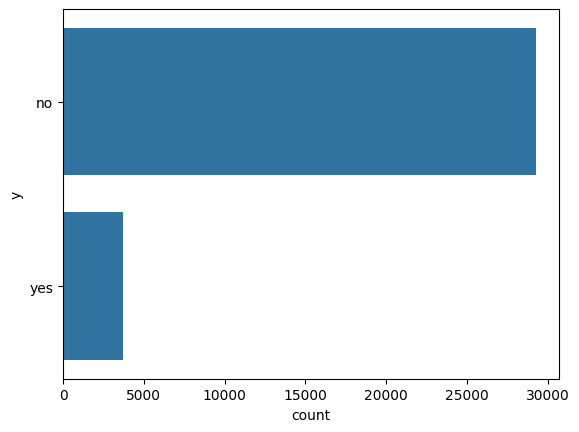

In [58]:
ratio = df_train['y'][df_train['y'] == "yes"].count() / df_train['y'].shape[0]
print('Ratio of classes (no : yes)', 1- ratio, ':', ratio)
sns.countplot(df_train['y'])
plt.show()

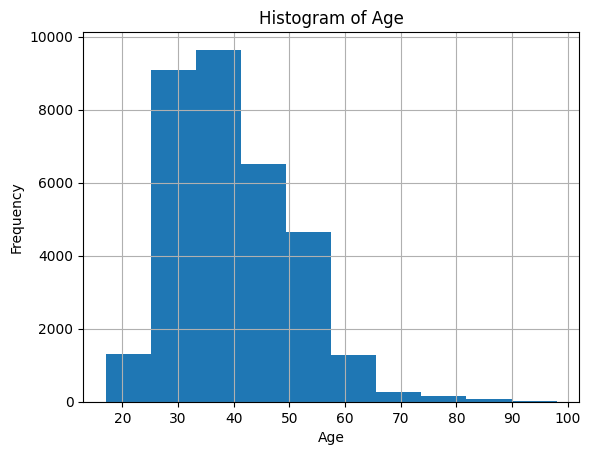

In [59]:
df_train['age'].hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [60]:
cols_cat = ['job', 'marital',
       'education', 'default',
       'housing', 'loan', 'contact', 'month',
       'day_of_week', 'poutcome']

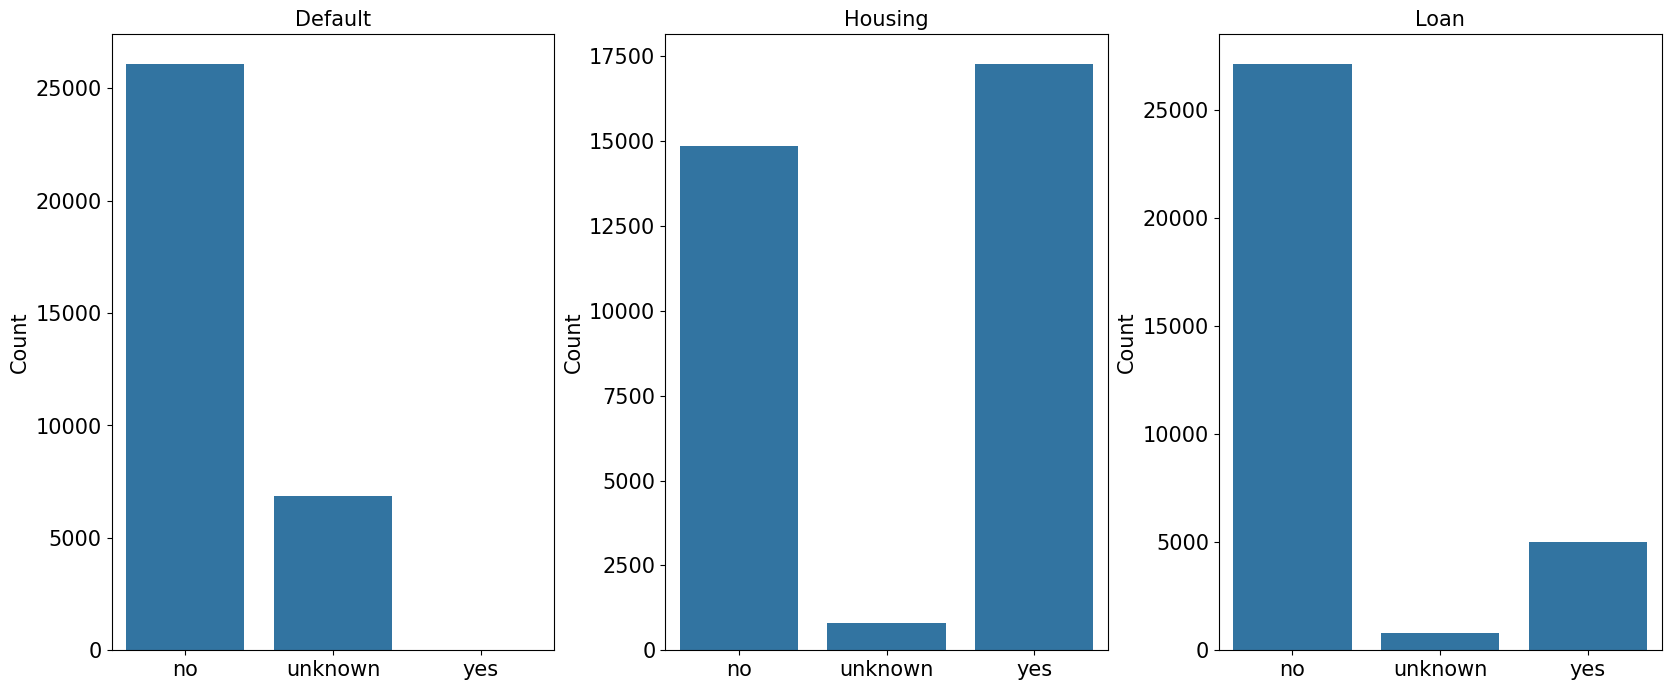

In [61]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = df_train[cols_cat], ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

sns.countplot(x = 'housing', data = df_train[cols_cat], ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

sns.countplot(x = 'loan', data = df_train[cols_cat], ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

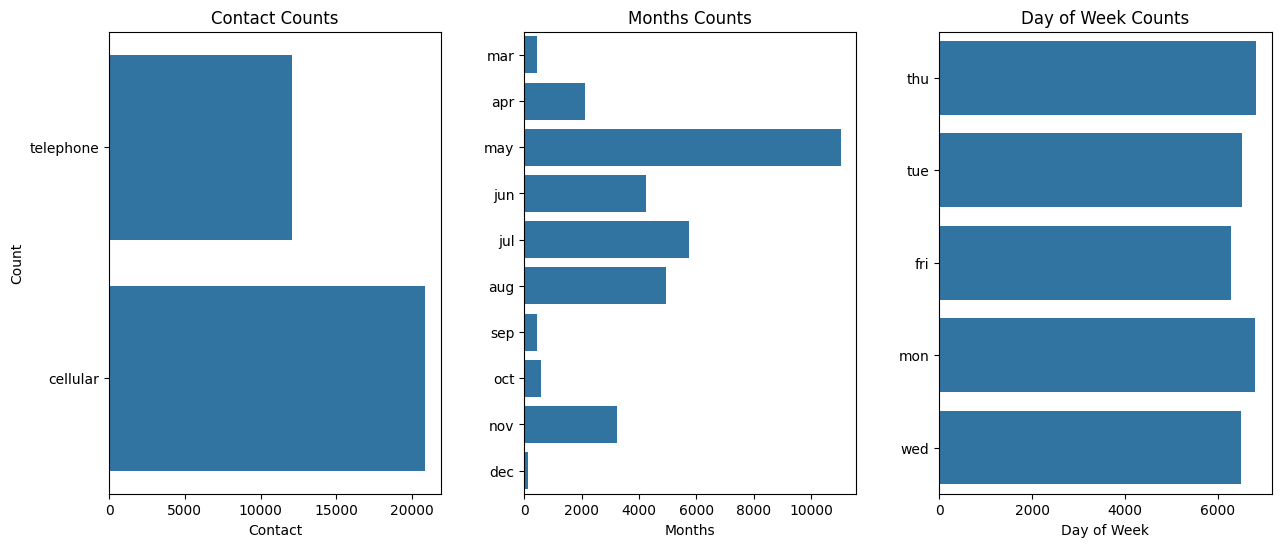

In [62]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(df_train[cols_cat]['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(df_train[cols_cat]['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

sns.countplot(df_train[cols_cat]['day_of_week'], ax = ax3)
ax3.set_xlabel('Day of Week', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)


 Describe Dataset_v2 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             32950 non-null  int64  
 1   age                            32950 non-null  int64  
 2   campaign                       32950 non-null  int64  
 3   pdays                          32950 non-null  int64  
 4   previous                       32950 non-null  int64  
 5   emp.var.rate                   32950 non-null  float64
 6   cons.price.idx                 32950 non-null  float64
 7   cons.conf.idx                  32950 non-null  float64
 8   euribor3m                      32950 non-null  float64
 9   nr.employed                    32950 non-null  float64
 10  y                              32950 non-null  int64  
 11  job_admin.                     32950 non-null  bool   
 12  job_blue-collar       

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

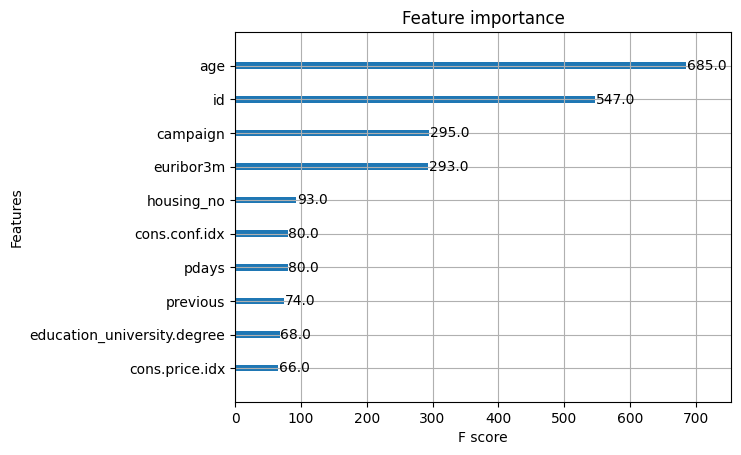

In [63]:
from xgboost import XGBClassifier
from xgboost import plot_importance

df_visual = df_train.copy()
df_visual['y'] = df_visual['y'].map({ 'no' : 0 , 'yes' : 1})

columns = df_visual.select_dtypes(include=[object]).columns
df_v = pd.concat([df_visual, pd.get_dummies(df_visual[columns])], axis=1)
df_v = df_v.drop(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week','poutcome'], axis =1)
print("\n","Describe Dataset_v2","\n")
print(df_v.info(),"\n \n \n")

X_train = df_v.loc[:, ~df_v.columns.isin(['y'])]
y_train = df_v['y']

xgbc = XGBClassifier(random_state=111)
xgbc.fit(X_train, y_train)

plot_importance(xgbc, max_num_features=10)

## Examination

In [64]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,32950.0,20569.615569,11895.520420,1.000,10258.250,20571.000,30846.750,41188.000
age,32950.0,40.023703,10.401749,17.000,32.000,38.000,47.000,98.000
campaign,32950.0,2.567830,2.766994,1.000,1.000,2.000,3.000,56.000
pdays,32950.0,962.415964,187.054556,0.000,999.000,999.000,999.000,999.000
previous,32950.0,0.172838,0.498098,0.000,0.000,0.000,0.000,7.000
emp.var.rate,32950.0,0.083129,1.571951,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,32950.0,93.576610,0.578725,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,32950.0,-40.500091,4.632363,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,32950.0,3.622516,1.734791,0.634,1.344,4.857,4.961,5.045
nr.employed,32950.0,5167.036495,72.250873,4963.600,5099.100,5191.000,5228.100,5228.100


In [65]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,8238.0,20694.031682,11868.573076,4.000,10457.750,20694.000,31056.250,41181.000
age,8238.0,40.025492,10.499522,17.000,32.000,38.000,47.000,94.000
campaign,8238.0,2.566642,2.782228,1.000,1.000,2.000,3.000,43.000
pdays,8238.0,962.713401,186.346378,0.000,999.000,999.000,999.000,999.000
previous,8238.0,0.173464,0.481933,0.000,0.000,0.000,0.000,5.000
emp.var.rate,8238.0,0.076912,1.567072,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,8238.0,93.571882,0.579322,92.201,93.075,93.444,93.994,94.767
cons.conf.idx,8238.0,-40.512637,4.611767,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,8238.0,3.616390,1.733168,0.635,1.334,4.857,4.961,5.045
nr.employed,8238.0,5167.033576,72.258533,4963.600,5099.100,5191.000,5228.100,5228.100


# Data Preprocessing

In [66]:
# Encode the Categorical Variables
df_train["month"] = df_train["month"].replace({"jul": 7, "jun": 6, "aug": 8, "may": 5, "oct" : 10, 'sep': 9, "nov": 11, "apr": 4, "mar":3, "dec": 12})


# make a derivative variable 'year'
df_train["year"] = df_train["cons.price.idx"]
df_train["year"] = df_train["cons.price.idx"].replace({93.918 : 2008, 92.963 : 2009, 93.444 : 2008, 92.893 : 2009,
                                                       94.027 : 2010, 92.431 : 2009, 94.199 : 2010, 94.465 : 2008,
                                                       92.649 : 2009, 93.994 : 2008, 93.075 : 2009, 93.2 : 2008,
                                                       94.601 : 2010, 92.469 : 2009, 92.201 : 2009, 93.369 : 2010,
                                                       93.876 : 2010, 92.713 : 2009, 93.798 : 2008, 92.843 : 2009,
                                                       92.379 : 2009, 94.055 : 2010, 94.215 : 2010, 93.749 : 2010,
                                                       94.767 : 2010, 92.756 : 2008})

In [67]:
# replace the unknown values with the mode values of them
df_train['job'].replace('unknown', df_train['job'].mode().iloc[0], inplace=True)
df_train['loan'].replace('unknown', df_train['loan'].mode().iloc[0], inplace=True)
df_train['marital'].replace('unknown', df_train['marital'].mode().iloc[0], inplace=True)

In [68]:
# droped these columns because they have strong correlation coefficient(shown in heatmap)
df_train = df_train.drop(labels=["euribor3m", "nr.employed"], axis=1)

In [69]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              32950 non-null  int64  
 1   age             32950 non-null  int64  
 2   job             32950 non-null  object 
 3   marital         32950 non-null  object 
 4   education       32950 non-null  object 
 5   default         32950 non-null  object 
 6   housing         32950 non-null  object 
 7   loan            32950 non-null  object 
 8   contact         32950 non-null  object 
 9   month           32950 non-null  int64  
 10  day_of_week     32950 non-null  object 
 11  campaign        32950 non-null  int64  
 12  pdays           32950 non-null  int64  
 13  previous        32950 non-null  int64  
 14  poutcome        32950 non-null  object 
 15  emp.var.rate    32950 non-null  float64
 16  cons.price.idx  32950 non-null  float64
 17  cons.conf.idx   32950 non-null 

##make Dummy variables

In [70]:
columns = df_train.select_dtypes(include=[object]).columns
df = pd.concat([df_train, pd.get_dummies(df_train[columns])], axis=1)
df = df.drop(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week','poutcome', 'y'], axis =1)
print("\n","Describe Dataset_v2","\n")
print(df.info(),"\n \n \n")


 Describe Dataset_v2 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             32950 non-null  int64  
 1   age                            32950 non-null  int64  
 2   campaign                       32950 non-null  int64  
 3   pdays                          32950 non-null  int64  
 4   previous                       32950 non-null  int64  
 5   emp.var.rate                   32950 non-null  float64
 6   cons.price.idx                 32950 non-null  float64
 7   cons.conf.idx                  32950 non-null  float64
 8   year                           32950 non-null  float64
 9   job_admin.                     32950 non-null  bool   
 10  job_blue-collar                32950 non-null  bool   
 11  job_entrepreneur               32950 non-null  bool   
 12  job_housemaid         

In [71]:
# droped 'default_yes' column
# because the test set does not have any yes value on default column
df = df.drop('default_yes', axis = 1)

##Scaling, Train-Test Split, Downsampling

In [72]:
min_max_scaler=preprocessing.MinMaxScaler()
data_scaled=pd.DataFrame(min_max_scaler.fit_transform(df),columns=df.columns)

In [73]:
y = data_scaled.y_yes
data_scaled = data_scaled.drop(['y_yes','y_no'], axis = 1)

In [74]:
df = df.drop(['y_yes','y_no'], axis = 1)

In [75]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NeighbourhoodCleaningRule

In [76]:
# NeighbourhoodCleaningRule을 사용하여 데이터 샘플링
X_samp, y_samp = NeighbourhoodCleaningRule(kind_sel="mode", n_neighbors=7).fit_resample(data_scaled, y)

In [77]:
# train-test split process
X_train, X_test, y_train, y_test = train_test_split(X_samp, y_samp, shuffle=True, test_size=0.2, random_state=42)

#Training & Validation

In [78]:
!pip install catboost
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold

In [79]:
# CatBoost 모델 정의
model = CatBoostClassifier()

param_grid = {'iterations': [300],'depth': [5],'learning_rate': [0.01, 0.05, 0.1],'l2_leaf_reg': [3, 5, 7]}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=5, verbose=1, n_jobs=-1 )

#model training
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score =  grid_search.best_score_

print(best_params)
print(best_score)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0:	learn: 0.6478178	total: 14.9ms	remaining: 4.45s
1:	learn: 0.6073405	total: 21.6ms	remaining: 3.22s
2:	learn: 0.5738296	total: 27.3ms	remaining: 2.7s
3:	learn: 0.5429655	total: 32.7ms	remaining: 2.42s
4:	learn: 0.5152436	total: 38.2ms	remaining: 2.25s
5:	learn: 0.4908694	total: 43.8ms	remaining: 2.15s
6:	learn: 0.4707452	total: 49.4ms	remaining: 2.07s
7:	learn: 0.4525706	total: 54.4ms	remaining: 1.99s
8:	learn: 0.4361023	total: 59.7ms	remaining: 1.93s
9:	learn: 0.4233021	total: 65.5ms	remaining: 1.9s
10:	learn: 0.4113028	total: 71.1ms	remaining: 1.87s
11:	learn: 0.4001541	total: 76.7ms	remaining: 1.84s
12:	learn: 0.3891644	total: 82.1ms	remaining: 1.81s
13:	learn: 0.3807673	total: 87.8ms	remaining: 1.79s
14:	learn: 0.3727950	total: 93.3ms	remaining: 1.77s
15:	learn: 0.3662532	total: 98.3ms	remaining: 1.74s
16:	learn: 0.3598689	total: 104ms	remaining: 1.73s
17:	learn: 0.3549300	total: 109ms	remaining: 1.71s
18:	learn: 0.34986

**result**


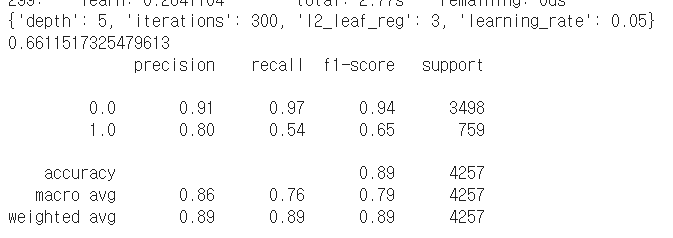

#Evaluation

In [80]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

y_prob = best_model.predict_proba(X_test)
print("Estimated probs:", y_prob[:10])

y_cls = best_model.predict(X_test)
print("Estimated classes:", y_cls[:10])
print()

Estimated probs: [[0.95883841 0.04116159]
 [0.96881442 0.03118558]
 [0.58483201 0.41516799]
 [0.88515083 0.11484917]
 [0.94704476 0.05295524]
 [0.87895707 0.12104293]
 [0.90249595 0.09750405]
 [0.93736435 0.06263565]
 [0.9058534  0.0941466 ]
 [0.95819304 0.04180696]]
Estimated classes: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]



In [81]:
print("Accuracy:", accuracy_score(y_test, y_cls))
print("F1:", f1_score(y_test, y_cls))
print("ROC AUC:", roc_auc_score(y_test, y_prob[:, 1]))

Accuracy: 0.8949964763918252
F1: 0.6483084185680567
ROC AUC: 0.8576186203898933


# Create a Submission File

In [82]:
# same preprocessing steps above

df_test["month"] = df_test["month"].replace({"jul": 7, "jun": 6, "aug": 8, "may": 5, "oct" : 10, 'sep': 9, "nov": 11, "apr": 4, "mar":3, "dec": 12})

df_test["year"] = df_test["cons.price.idx"]
df_test["year"] = df_test["cons.price.idx"].replace({93.918 : 2008, 92.963 : 2009, 93.444 : 2008, 92.893 : 2009,
                                                       94.027 : 2010, 92.431 : 2009, 94.199 : 2010, 94.465 : 2008,
                                                       92.649 : 2009, 93.994 : 2008, 93.075 : 2009, 93.2 : 2008,
                                                       94.601 : 2010, 92.469 : 2009, 92.201 : 2009, 93.369 : 2010,
                                                       93.876 : 2010, 92.713 : 2009, 93.798 : 2008, 92.843 : 2009,
                                                       92.379 : 2009, 94.055 : 2010, 94.215 : 2010, 93.749 : 2010,
                                                       94.767 : 2010, 92.756 : 2008})

In [83]:
df_test['job'].replace('unknown', df_test['job'].mode().iloc[0], inplace=True)
df_test['loan'].replace('unknown', df_test['loan'].mode().iloc[0], inplace=True)
df_test['marital'].replace('unknown', df_test['marital'].mode().iloc[0], inplace=True)

In [84]:
columns = df_test.select_dtypes(include=[object]).columns
df1 = pd.concat([df_test, pd.get_dummies(df_test[columns])], axis=1)
df1 = df1.drop(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week','poutcome'], axis = 1)
# same code but we did not include the column y
print("\n","Describe Dataset_v2","\n")
print(df1.info(),"\n \n \n")


 Describe Dataset_v2 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8238 entries, 0 to 8237
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             8238 non-null   int64  
 1   age                            8238 non-null   int64  
 2   campaign                       8238 non-null   int64  
 3   pdays                          8238 non-null   int64  
 4   previous                       8238 non-null   int64  
 5   emp.var.rate                   8238 non-null   float64
 6   cons.price.idx                 8238 non-null   float64
 7   cons.conf.idx                  8238 non-null   float64
 8   euribor3m                      8238 non-null   float64
 9   nr.employed                    8238 non-null   float64
 10  year                           8238 non-null   float64
 11  job_admin.                     8238 non-null   bool   
 12  job_blue-collar         

In [85]:
min_max_scaler=preprocessing.MinMaxScaler()
test_scaled=pd.DataFrame(min_max_scaler.fit_transform(df1),columns=df1.columns)

In [86]:
y_final = best_model.predict(test_scaled)

In [87]:
len(y_final) == len(df_test)

True

In [88]:
df_test['y_predict'] = pd.DataFrame(y_final)

In [89]:
df_test['y_predict'].value_counts()

y_predict
0.0    7129
1.0    1109
Name: count, dtype: int64

In [90]:
df_test.head()

,id,age,job,marital,education,default,housing,loan,contact,month,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,year,y_predict
0,24188,54,admin.,married,university.degree,no,no,no,cellular,11,...,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,2008.0,0.0
1,8688,36,entrepreneur,married,university.degree,no,yes,yes,telephone,6,...,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,2008.0,0.0
2,35789,27,unemployed,married,high.school,no,yes,no,cellular,5,...,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,2009.0,0.0
3,20034,39,admin.,married,university.degree,no,yes,no,cellular,8,...,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,2008.0,0.0
4,11392,43,services,married,high.school,unknown,yes,no,telephone,6,...,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,2008.0,0.0


In [91]:
data_path = os.path.join(root_dir, "prediction.csv")

df_test.to_csv(data_path)